In [1]:
import numpy as np
import pandas as pd
import re as re

In [2]:
df_batting = pd.read_csv('batsman_cleaned.csv')
list_of_cols = df_batting.columns.tolist()
list_of_cols = list_of_cols[1:]
df_batting = df_batting[list_of_cols]
df_batting.head()

C:\Users\Hitesh Mohite\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date,batsman,country,runs,mins,bf,4s,6s,SR,inns,opposition,venue
0,2014-11-13,RG Sharma,India,264,225,173,33,9,152.6,1,Sri Lanka,Kolkata
1,2015-03-21,MJ Guptill,New Zealand,237*,223,163,24,11,145.39,1,West Indies,Wellington
2,2011-12-08,V Sehwag,India,219,208,149,25,7,146.97,1,West Indies,Indore
3,2015-02-24,CH Gayle,West Indies,215,212,147,10,16,146.25,1,Zimbabwe,Canberra
4,2013-11-02,RG Sharma,India,209,222,158,12,16,132.27,1,Australia,Bengaluru


In [3]:
country_mapper = {
    'India' : 1, 'New Zealand' : 2, 'West Indies' : 3, 'Zimbabwe' : 4, 'Pakistan' : 5, 
    'Sri Lanka' : 10, 'South Africa' : 9, 'Australia' : 8, 'England' : 7, 'Ireland' : 6,
    'Scotland' : 11, 'Bangladesh' : 12, 'P.N.G.' : 13, 'Kenya' : 14, 'Hong Kong' : 15,
    'Asia XI' : 20, 'Canada' : 19, 'Netherlands' : 18, 'U.A.E.' : 17, 'Afghanistan' : 16, 
    'Africa XI' : 21, 'ICC World XI' : 22, 'Bermuda' : 23, 'Namibia' : 24, 'East Africa' : 25, 'U.S.A.' : 26
}

In [4]:
df_batting = df_batting.replace({'country' : country_mapper, 'opposition' : country_mapper})
df_batting.head()

,date,batsman,country,runs,mins,bf,4s,6s,SR,inns,opposition,venue
0,2014-11-13,RG Sharma,1,264,225,173,33,9,152.6,1,10,Kolkata
1,2015-03-21,MJ Guptill,2,237*,223,163,24,11,145.39,1,3,Wellington
2,2011-12-08,V Sehwag,1,219,208,149,25,7,146.97,1,3,Indore
3,2015-02-24,CH Gayle,3,215,212,147,10,16,146.25,1,4,Canberra
4,2013-11-02,RG Sharma,1,209,222,158,12,16,132.27,1,8,Bengaluru


In [5]:
total_venues = len(df_batting.venue.unique())
total_venues

173

In [6]:
numbers = range(1, len(df_batting.venue.unique()) + 1)
venue_mapper = dict(zip(df_batting.venue.unique(), numbers))
len(venue_mapper)

173

In [7]:
df_batting = df_batting.replace({'venue' : venue_mapper})
df_batting.head()

,date,batsman,country,runs,mins,bf,4s,6s,SR,inns,opposition,venue
0,2014-11-13,RG Sharma,1,264,225,173,33,9,152.6,1,10,1
1,2015-03-21,MJ Guptill,2,237*,223,163,24,11,145.39,1,3,2
2,2011-12-08,V Sehwag,1,219,208,149,25,7,146.97,1,3,3
3,2015-02-24,CH Gayle,3,215,212,147,10,16,146.25,1,4,4
4,2013-11-02,RG Sharma,1,209,222,158,12,16,132.27,1,8,5


In [8]:
numbers = range(1, len(df_batting.batsman.unique()) + 1)
batsman_mapper = dict(zip(df_batting.batsman.unique(), numbers))
df_batting = df_batting.replace({'batsman' : batsman_mapper})
df_batting.head()

,date,batsman,country,runs,mins,bf,4s,6s,SR,inns,opposition,venue
0,2014-11-13,1,1,264,225,173,33,9,152.6,1,10,1
1,2015-03-21,2,2,237*,223,163,24,11,145.39,1,3,2
2,2011-12-08,3,1,219,208,149,25,7,146.97,1,3,3
3,2015-02-24,4,3,215,212,147,10,16,146.25,1,4,4
4,2013-11-02,1,1,209,222,158,12,16,132.27,1,8,5


In [9]:
df_temp = df_batting[df_batting.runs == 'DNB']
df_batting = df_batting.drop(df_temp.index, axis=0)
df_temp = df_batting[df_batting.runs == 'TDNB']
df_batting = df_batting.drop(df_temp.index, axis=0)
df_batting.head()

,date,batsman,country,runs,mins,bf,4s,6s,SR,inns,opposition,venue
0,2014-11-13,1,1,264,225,173,33,9,152.6,1,10,1
1,2015-03-21,2,2,237*,223,163,24,11,145.39,1,3,2
2,2011-12-08,3,1,219,208,149,25,7,146.97,1,3,3
3,2015-02-24,4,3,215,212,147,10,16,146.25,1,4,4
4,2013-11-02,1,1,209,222,158,12,16,132.27,1,8,5


In [11]:
len(df_batting)

70126

In [65]:
k = df_batting.runs.tolist()
k = list(map(lambda x : re.findall('\d+', x), k))
#df_batting.runs = k
#df_batting.head()
k[0]

['264']

In [66]:
h = []
(lambda x : print(x[0]), k)
h

[]

In [67]:
#j = k[0][0]
#j
temp = []
for i in k:
    if len(i) > 0:
        temp.append(i[0])
    else:
        temp.append('0')
temp

['264',
 '237',
 '219',
 '215',
 '209',
 '208',
 '200',
 '194',
 '194',
 '189',
 '189',
 '189',
 '188',
 '186',
 '185',
 '185',
 '183',
 '183',
 '183',
 '181',
 '181',
 '181',
 '180',
 '180',
 '179',
 '178',
 '178',
 '178',
 '177',
 '176',
 '176',
 '175',
 '175',
 '175',
 '175',
 '175',
 '174',
 '173',
 '173',
 '172',
 '172',
 '172',
 '171',
 '171',
 '171',
 '170',
 '169',
 '169',
 '169',
 '169',
 '168',
 '167',
 '166',
 '164',
 '164',
 '163',
 '163',
 '162',
 '162',
 '161',
 '161',
 '161',
 '161',
 '160',
 '160',
 '160',
 '160',
 '160',
 '159',
 '159',
 '158',
 '158',
 '158',
 '157',
 '157',
 '157',
 '156',
 '156',
 '156',
 '156',
 '156',
 '156',
 '154',
 '154',
 '154',
 '154',
 '154',
 '154',
 '153',
 '153',
 '153',
 '153',
 '153',
 '153',
 '153',
 '153',
 '152',
 '152',
 '152',
 '152',
 '152',
 '152',
 '152',
 '151',
 '151',
 '151',
 '151',
 '150',
 '150',
 '150',
 '150',
 '150',
 '150',
 '150',
 '149',
 '149',
 '149',
 '149',
 '149',
 '148',
 '148',
 '148',
 '148',
 '147',
 '147',


In [68]:
len(temp)
#df_batting.shape

70126

In [69]:
#df_batting.runs = df_batting.runs.str.replace('[', '')
#df_batting.runs = df_batting.runs.str.replace(']', '')
#df_batting.runs = df_batting.runs.str.strip('[]')
df_batting.runs = temp
df_batting.runs = pd.to_numeric(df_batting.runs)
df_batting.bf[df_batting.bf == '-'] = df_batting.runs[df_batting.bf == '-']
df_batting.bf = pd.to_numeric(df_batting.bf)
#df_batting.sr = pd.to_numeric(df_batting.sr)
df_batting.head()

C:\Users\Hitesh Mohite\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,batsman,country,runs,mins,bf,4s,6s,SR,inns,opposition,venue
0,2014-11-13,1,1,264,225,173.0,33,9,152.6,1,10,1
1,2015-03-21,2,2,237,223,163.0,24,11,145.39,1,3,2
2,2011-12-08,3,1,219,208,149.0,25,7,146.97,1,3,3
3,2015-02-24,4,3,215,212,147.0,10,16,146.25,1,4,4
4,2013-11-02,1,1,209,222,158.0,12,16,132.27,1,8,5


In [70]:
country_1_players = df_batting[df_batting.country == 1]
country_8_players = df_batting[df_batting.country == 8]

In [71]:
temp = country_1_players.batsman.unique()
team_1_players = temp.tolist()
temp = country_8_players.batsman.unique()
team_8_players = temp.tolist()

In [72]:
players_team_1 = []
for player in team_1_players:
    df_temp = country_1_players[country_1_players.batsman == player]
    df_temp = df_temp.sort_values(by=['date'])
    players_team_1.append(df_temp)
players_team_8 = []
for player in team_8_players:
    df_temp = country_8_players[country_8_players.batsman == player]
    df_temp = df_temp.sort_values(by=['date'])
    players_team_8.append(df_temp)

In [79]:
players_team_1[0].head()

,date,batsman,country,runs,mins,bf,4s,6s,SR,inns,opposition,venue
43402,2007-06-26,1,1,8,13,9.0,0,0,88.88,1,9,43
61818,2007-10-05,1,1,1,3,4.0,0,0,25,2,8,14
9165,2007-11-18,1,1,52,82,61.0,3,1,85.24,2,5,17
19906,2008-02-03,1,1,29,68,43.0,5,0,67.44,1,8,42
67965,2008-02-05,1,1,0,1,2.0,0,0,0,1,10,42


In [80]:
#for player in players_team_1:
#    print(len(player))
#len(team_8_players)
runs_temp = players_team_1[0].runs.tolist()
for num, item in enumerate(runs_temp):
    print(num, item)
#sr = players_team_1[0].SR.tolist()
#type(runs[0])
#type(sr[0])
#sum(runs_temp[:5])
len(players_team_1[15])

0 8
1 1
2 52
3 29
4 0
5 39
6 70
7 1
8 24
9 1
10 3
11 66
12 2
13 9
14 26
15 24
16 11
17 0
18 22
19 58
20 22
21 3
22 19
23 0
24 32
25 18
26 3
27 11
28 3
29 28
30 8
31 25
32 4
33 15
34 43
35 4
36 0
37 11
38 48
39 114
40 101
41 13
42 32
43 0
44 22
45 69
46 41
47 4
48 0
49 11
50 5
51 44
52 11
53 9
54 23
55 1
56 5
57 68
58 7
59 86
60 39
61 57
62 0
63 72
64 90
65 95
66 27
67 21
68 21
69 10
70 33
71 15
72 0
73 4
74 68
75 5
76 0
77 0
78 4
79 4
80 4
81 83
82 4
83 65
84 52
85 18
86 33
87 9
88 60
89 5
90 46
91 48
92 58
93 20
94 1
95 14
96 64
97 42
98 141
99 11
100 9
101 79
102 209
103 72
104 12
105 4
106 18
107 19
108 3
109 20
110 39
111 79
112 4
113 21
114 13
115 56
116 18
117 52
118 264
119 9
120 138
121 15
122 0
123 57
124 7
125 64
126 16
127 137
128 34
129 63
130 0
131 29
132 150
133 3
134 65
135 21
136 16
137 171
138 124
139 6
140 41
141 99
142 14
143 15
144 13
145 11
146 70
147 91
148 78
149 12
150 123
151 0
152 4
153 54
154 124
155 104
156 16
157 28
158 7
159 71
160 65
161 125
162 20
163 7


30

In [81]:
len(players_team_1)

209

In [109]:
list_data_of_player_for_model_1 = []
list_ID_of_player_in_model_1 = []
for player_stats in players_team_1:
    temp = 0
    match_count = 0
    match_no = []
    r_avg = []
    r_sr = []
    c_avg = []
    c_sr = []
    label = []
    runs = player_stats.runs.tolist()
    bf = player_stats.bf.tolist()
    
    if len(player_stats) >= 50:
        #print(len(player_stats))
        list_ID_of_player_in_model_1.append(player_stats.batsman.tolist()[0])
        for num, item  in enumerate(runs):
            if num >= 3:
                match_count += 1
                match_no.append(match_count)
                recent_runs = runs[num - 1] + runs[num - 2] + runs[num - 3]
                recent_balls = bf[num - 1] + bf[num - 2] + bf[num - 3]
                total_runs = sum(runs[:num])
                total_bf = sum(bf[:num])
                temp = round((recent_runs / 3), 2)
                r_avg.append(temp)
                if recent_balls == 0 and recent_runs == 0:
                    r_sr.append(round(0,2))
                else:
                    temp = round((recent_runs / recent_balls) * 100, 2)
                    r_sr.append(temp)
                
                #temp = round((recent_runs / recent_balls) * 100, 2)
                #r_sr.append(temp)
                temp = round((total_runs / (num)), 2)
                c_avg.append(temp)
                if total_runs == 0 and total_bf == 0:
                    c_sr.append(round(0,2))
                else:
                    temp = round((total_runs / total_bf) * 100, 2)
                    c_sr.append(temp)
                
                #temp = round((total_runs / total_bf) * 100, 2)
                #c_sr.append(temp)
                label.append(runs[num])
                
        model_batsman_data = {
            'No' : match_no,
            'R_Avg' : r_avg,
            'R_SR' : r_sr,
            'C_Avg' : c_avg,
            'C_SR' : c_sr,
            'label': label
        }
    
        df_temp = pd.DataFrame(model_batsman_data)
        list_data_of_player_for_model_1.append(df_temp)

In [110]:
#for i in list_data_of_player_for_model_1:
#    print(len(i))
len(list_data_of_player_for_model_1)

40

In [111]:
len(list_ID_of_player_in_model_1)
list_ID_of_player_in_model_1[15]

181

In [112]:
batsman_mapper

{'RG Sharma ': 1,
 'MJ Guptill ': 2,
 'V Sehwag ': 3,
 'CH Gayle ': 4,
 'SR Tendulkar ': 5,
 'CK Coventry ': 6,
 'Saeed Anwar ': 7,
 'IVA Richards ': 8,
 'ST Jayasuriya ': 9,
 'G Kirsten ': 10,
 'SR Watson ': 11,
 'F du Plessis ': 12,
 'MS Dhoni ': 13,
 'SC Ganguly ': 14,
 'V Kohli ': 15,
 'ML Hayden ': 16,
 'LRPL Taylor ': 17,
 'JJ Roy ': 18,
 'DA Warner ': 19,
 'H Masakadza ': 20,
 'Q de Kock ': 21,
 'PR Stirling ': 22,
 'E Lewis ': 23,
 'AB de Villiers ': 24,
 'N Kapil Dev ': 25,
 'HH Gibbs ': 26,
 'CS MacLeod ': 27,
 'WU Tharanga ': 28,
 'ME Waugh ': 29,
 'CB Wishart ': 30,
 'AC Gilchrist ': 31,
 'L Vincent ': 32,
 'GM Turner ': 33,
 'AD Hales ': 34,
 'L Ronchi ': 35,
 'DJ Callaghan ': 36,
 'BC Lara ': 37,
 'KC Sangakkara ': 38,
 'D Ramdin ': 39,
 'RA Smith ': 40,
 'BB McCullum ': 41,
 'RT Ponting ': 42,
 'SPD Smith ': 43,
 'TM Dilshan ': 44,
 'AC Hudson ': 45,
 'JAH Marshall ': 46,
 'EC Joyce ': 47,
 'Imran Nazir ': 48,
 'D Mongia ': 49,
 'HM Amla ': 50,
 'DI Gower ': 51,
 'AJ Str

In [115]:
for name, number in batsman_mapper.items():    # for name, age in list.items():  (for Python 3.x)
    if number == 181:
        print(name)

K Srikkanth 


In [164]:
t = list_data_of_player_for_model_1[15]
t.head()

,C_Avg,C_SR,No,R_Avg,R_SR,label
0,24.67,89.16,1,24.67,89.16,95
1,42.25,113.42,2,56.33,121.58,92
2,52.20,112.50,3,81.33,127.08,6
3,44.50,108.10,4,64.33,117.68,8
4,39.29,102.61,5,35.33,89.08,39


In [165]:
list_data_of_player_for_model_8 = []
list_ID_of_player_in_model_8 = []
for player_stats in players_team_8:
    temp = 0
    match_count = 0
    match_no = []
    r_avg = []
    r_sr = []
    c_avg = []
    c_sr = []
    label = []
    runs = player_stats.runs.tolist()
    bf = player_stats.bf.tolist()
    
    if len(runs) >= 50:
        list_ID_of_player_in_model_8.append(player_stats.batsman)
        for num, item  in enumerate(runs):
            if num >= 3:
                match_count += 1
                match_no.append(match_count)
                recent_runs = runs[num - 1] + runs[num - 2] + runs[num - 3]
                recent_balls = bf[num - 1] + bf[num - 2] + bf[num - 3]
                total_runs = sum(runs[:num])
                total_bf = sum(bf[:num])
                temp = round((recent_runs / 3), 2)
                r_avg.append(temp)
                #print(bf[num - 1] ,bf[num - 2] ,bf[num - 3])
                if recent_balls == 0 and recent_runs == 0:
                    r_sr.append(round(0,2))
                else:
                    temp = round((recent_runs / recent_balls) * 100, 2)
                    r_sr.append(temp)
                temp = round((total_runs / (num)), 2)
                c_avg.append(temp)
                if total_runs == 0 and total_bf == 0:
                    c_sr.append(round(0,2))
                else:
                    temp = round((total_runs / total_bf) * 100, 2)
                    c_sr.append(temp)
                label.append(runs[num])
                
        model_batsman_data = {
            'No' : match_no,
            'R_Avg' : r_avg,
            'R_SR' : r_sr,
            'C_Avg' : c_avg,
            'C_SR' : c_sr,
            'label': label
        }
    
        df_temp = pd.DataFrame(model_batsman_data)
        list_data_of_player_for_model_8.append(df_temp)

In [166]:
len(list_data_of_player_for_model_8)

48

In [167]:
t = list_data_of_player_for_model_8[3]
t.head()
len(list_ID_of_player_in_model_8)

48

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [169]:
predict_data_1 = []
model_data_1 = []
train_accuracy_1 = []
test_accuracy_1 = []
predict_label_1 = []
actual_label_1 = []

for player_data in list_data_of_player_for_model_1:
    
    scaler = MinMaxScaler()
    df_dataset = pd.DataFrame()
    df_dataset = player_data

    list_of_cols = df_dataset.columns.tolist()
    list_of_cols = list_of_cols[: -1]
    X = df_dataset[list_of_cols]
    y = df_dataset['label']
    X = scaler.fit_transform(X)
    
    input_predict = X[len(X)-1:]
    #print(input_predict[0])
    #input_predict = input_predict.values.tolist()[0]
    predict_data_1.append(input_predict[0])
    label = y[len(y)-1:].values.tolist()[0]
    actual_label_1.append(label)
    X = X[:len(X) - 1]
    y = y[:len(y) - 1]
    model_data_1.append(player_data)
    #model = df_dataset[:len(df_dataset)-1]
    #model_data.append(df_dataset[:len(df_dataset)-1])
    #input_predict = df_dataset[len(df_dataset)-1:]
    #label = input_predict.label.tolist()[0]
    #actual_label.append(label)
    #input_predict = input_predict.values.tolist()[0]
    #predict_data.append(input_predict)
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
    
    linreg = LinearRegression().fit(X_train, y_train)
    
    temp = round(linreg.score(X_train, y_train) * 100, 2)
    train_accuracy_1.append(temp)
    temp = round(linreg.score(X_test, y_test) * 100, 2)
    test_accuracy_1.append(temp)
    temp = linreg.predict(input_predict)[0]
    predict_label_1.append(temp)

In [170]:
print(actual_label_1)
#print(train_accuracy)

[15, 31, 52, 13, 5, 129, 12, 17, 1, 69, 24, 39, 18, 0, 0, 0, 93, 12, 10, 34, 5, 7, 3, 54, 7, 4, 15, 16, 1, 11, 29, 26, 4, 1, 1, 0, 10, 2, 2, 10]


In [171]:
print(predict_label_1)

[60.519115136064478, 47.958329717588192, 48.426289468349992, 35.552030401785444, 31.36740536488189, 53.570341899913018, 15.824357654392383, 12.515411916671731, 31.107940933995213, 31.121384380612142, 44.093124037342605, 39.820899999922879, 50.553666233839891, 23.842736731317206, 37.423237890624414, 32.047524810305035, 32.784067648965404, 30.50687834335374, 20.582030325152523, 40.861562897529836, 23.443160462264018, 37.116868810661927, 20.645670811574291, 33.244897510666497, 31.820444428793515, 38.466272388437282, 39.672931166944878, 20.845787431028569, 10.770312508737769, 11.687664373901949, 20.903832571422107, 20.959473045162429, 13.740385001540258, 13.117189664745617, 1.9605501776170602, 13.326274788689769, 14.407965880612046, 7.4581319078938275, 4.5619504672091411, 4.340647859384732]


In [172]:
predict_label_1 = list(map(lambda x: int(round(x)), predict_label_1))
predict_label_1 = list(map(lambda x: abs(x), predict_label_1))
predict_label_1

[61,
 48,
 48,
 36,
 31,
 54,
 16,
 13,
 31,
 31,
 44,
 40,
 51,
 24,
 37,
 32,
 33,
 31,
 21,
 41,
 23,
 37,
 21,
 33,
 32,
 38,
 40,
 21,
 11,
 12,
 21,
 21,
 14,
 13,
 2,
 13,
 14,
 7,
 5,
 4]

In [173]:
predict_data_2 = []
model_data_2 = []
train_accuracy_2 = []
test_accuracy_2 = []
predict_label_2 = []
actual_label_2 = []

for player_data in list_data_of_player_for_model_8:
    
    scaler = MinMaxScaler()
    df_dataset = pd.DataFrame()
    df_dataset = player_data

    list_of_cols = df_dataset.columns.tolist()
    list_of_cols = list_of_cols[: -1]
    X = df_dataset[list_of_cols]
    y = df_dataset['label']
    X = scaler.fit_transform(X)
    
    input_predict = X[len(X)-1:]
    #print(input_predict[0])
    #input_predict = input_predict.values.tolist()[0]
    predict_data_2.append(input_predict[0])
    label = y[len(y)-1:].values.tolist()[0]
    actual_label_2.append(label)
    X = X[:len(X) - 1]
    y = y[:len(y) - 1]
    model_data_2.append(player_data)
    #model = df_dataset[:len(df_dataset)-1]
    #model_data.append(df_dataset[:len(df_dataset)-1])
    #input_predict = df_dataset[len(df_dataset)-1:]
    #label = input_predict.label.tolist()[0]
    #actual_label.append(label)
    #input_predict = input_predict.values.tolist()[0]
    #predict_data.append(input_predict)
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
    
    linreg = LinearRegression().fit(X_train, y_train)
    
    temp = round(linreg.score(X_train, y_train) * 100, 2)
    train_accuracy_2.append(temp)
    temp = round(linreg.score(X_test, y_test) * 100, 2)
    test_accuracy_2.append(temp)
    temp = linreg.predict(input_predict)[0]
    predict_label_2.append(temp)

In [174]:
print(actual_label_2)

[39, 55, 15, 34, 2, 7, 12, 15, 23, 22, 62, 8, 47, 9, 74, 11, 39, 33, 42, 6, 12, 6, 34, 20, 7, 65, 14, 57, 11, 3, 34, 20, 11, 3, 10, 27, 23, 35, 12, 27, 0, 27, 0, 15, 22, 1, 3, 5]


In [175]:
print(predict_label_2)

[45.467070119136316, 47.098005035610683, 66.170634888399974, 34.146508985368399, 39.819716370241302, 42.405511052432296, 40.917691695485857, 32.869266207890782, 5.4406635947516087, 31.661180323251216, 72.471927191254707, 29.270947766341003, 22.642538642810077, 28.324786938113263, 47.031762409162745, 25.150909637010194, 41.104199668787516, 34.770279337531079, 24.342794235314429, 11.993562109793274, 15.533010231910183, 29.065624532275649, 41.666344777503717, 10.089522979490582, 25.389962462762281, 30.371939877651428, 40.334446630323036, 55.415218852650831, 37.876665734805947, 5.0568349191891429, 35.393108685085238, 20.233057021716363, 19.520535359920896, 29.457304688257857, 7.6976446828355733, 7.4774623449140014, 18.121768268507253, 36.54916115499239, 24.398062684766035, 10.014306991608773, 6.308123637759774, 19.076611104869219, 11.812119755887453, 23.43551416179146, 11.365206499858246, 2.6956290254376238, -3.3129098161122172, 0.99897692302936214]


In [176]:
predict_label_2 = list(map(lambda x: int(round(x)), predict_label_2))
predict_label_2 = list(map(lambda x: abs(x), predict_label_2))
predict_label_2

[45,
 47,
 66,
 34,
 40,
 42,
 41,
 33,
 5,
 32,
 72,
 29,
 23,
 28,
 47,
 25,
 41,
 35,
 24,
 12,
 16,
 29,
 42,
 10,
 25,
 30,
 40,
 55,
 38,
 5,
 35,
 20,
 20,
 29,
 8,
 7,
 18,
 37,
 24,
 10,
 6,
 19,
 12,
 23,
 11,
 3,
 3,
 1]

In [177]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sb

<IPython.core.display.Javascript object>


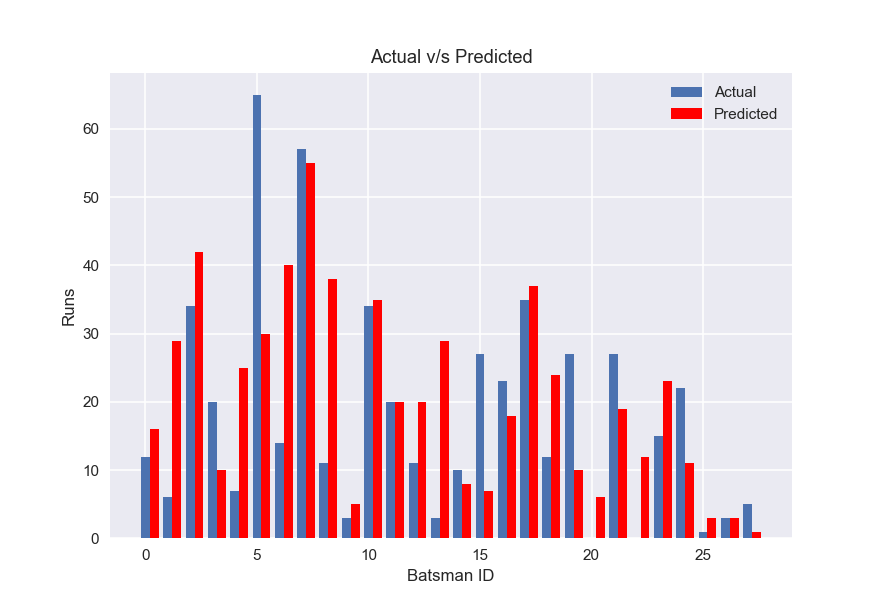

In [181]:
xvals_1 = range(len(list_ID_of_player_in_model_8[20:]))
data_1 = np.array(actual_label_2[20:])
data_2 = np.array(predict_label_2[20:])
plt.figure()
plt.bar(xvals_1, data_1, width=0.4)
plt.bar(np.array(xvals_1) + 0.4, data_2, width=0.4, color='red')
plt.xlabel('Batsman ID')
plt.ylabel('Runs')
plt.title('Actual v/s Predicted')
plt.legend(['Actual', 'Predicted'], loc=1)